In [1]:
#!pip install tensorflow-gpu==1.14.0

In [2]:
#!pip install keras-gpu==2.2.5

In [3]:
#!pip install keras==2.2.5

In [4]:
import os
os.environ["PYTHONHASHSEED"] = "13"
os.environ["CUDA_VISIBLE_DEVICES"] = "0:1"

import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(13)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(13)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(13)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [5]:
import gc
import warnings

#import lightgbm as lgb
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tqdm.notebook import tqdm

import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout

path_data = "../input/ashrae-energy-prediction/"
path_train = path_data + "train.csv"
path_test = path_data + "test.csv"
path_building = path_data + "building_metadata.csv"
path_weather_train = path_data + "weather_train.csv"
path_weather_test = path_data + "weather_test.csv"

myfavouritenumber = 13
seed = myfavouritenumber

warnings.filterwarnings("ignore")

In [6]:
site_id = 3

In [7]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

building = pd.read_csv(path_building)

weather_train = pd.read_csv(path_weather_train)
weather_test = pd.read_csv(path_weather_test)

weather_train.drop(["sea_level_pressure", "wind_direction", "wind_speed"], axis=1, inplace=True)
weather_test.drop(["sea_level_pressure", "wind_direction", "wind_speed"], axis=1, inplace=True)

weather_train = weather_train.groupby("site_id").apply(lambda group: group.interpolate(limit_direction="both"))
weather_test = weather_test.groupby("site_id").apply(lambda group: group.interpolate(limit_direction="both"))

df_train = df_train.merge(building, on="building_id")
df_test = df_test.merge(building, on="building_id")

df_train = df_train[df_train.site_id == site_id]
df_test = df_test[df_test.site_id == site_id]

df_train["log_meter_reading"] = np.log1p(df_train.meter_reading)

df_train = df_train[~((df_train.building_id == 291) & (df_train.log_meter_reading < 4.5))]
df_train = df_train[~((df_train.building_id == 292) & (df_train.log_meter_reading > 5.4))]
df_train = df_train[~((df_train.building_id == 296) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 298) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 299) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 300) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 301) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 302) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 308) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 310) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 311) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 313) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 319) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 320) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 323) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 335) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 342) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 343) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 347) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 350) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 352) & (df_train.log_meter_reading > 6))]
df_train = df_train[~((df_train.building_id == 360) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 361) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 365) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 372) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 373) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 375) & (df_train.log_meter_reading < 4))]
df_train = df_train[~((df_train.building_id == 376) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 382) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 384) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 386) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 392) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 393) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 394) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 395) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 401) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 404) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 407) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 408) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 409) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 412) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 413) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 414) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 417) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 422) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 425) & (df_train.log_meter_reading < 4))]
df_train = df_train[~((df_train.building_id == 426) & (df_train.log_meter_reading < 4))]
df_train = df_train[~((df_train.building_id == 427) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 429) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 430) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 431) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 432) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 433) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 440) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 441) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 442) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 443) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 447) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 448) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 450) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 451) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 453) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 456) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 457) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 458) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 462) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 475) & (df_train.log_meter_reading < 4))]
df_train = df_train[~((df_train.building_id == 477) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 479) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 480) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 481) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 482) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 483) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 484) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 486) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 488) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 492) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 493) & (df_train.log_meter_reading < 5))]
df_train = df_train[~((df_train.building_id == 494) & (df_train.log_meter_reading < 3.2))]
df_train = df_train[~((df_train.building_id == 495) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 503) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 508) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 509) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 510) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 516) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 525) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 529) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 531) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 535) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 537) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 545) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 549) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 552) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 554) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 557) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 558) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 560) & (df_train.log_meter_reading < 5))]
df_train = df_train[~((df_train.building_id == 562) & (df_train.log_meter_reading < 1))]

df_train = df_train[df_train.meter == 0]

df_train = df_train.merge(weather_train, on=["site_id", "timestamp"], how="left")
df_test = df_test.merge(weather_test, on=["site_id", "timestamp"], how="left")

df_train.timestamp = pd.to_datetime(df_train.timestamp, format='%Y-%m-%d %H:%M:%S')
df_test.timestamp = pd.to_datetime(df_test.timestamp, format='%Y-%m-%d %H:%M:%S')

df_train.building_id = df_train.building_id.astype("str")
df_test.building_id = df_test.building_id.astype("str")

del building
gc.collect()

49

In [8]:
df_train["hour"] = df_train.timestamp.dt.hour.astype("str")
df_test["hour"] = df_test.timestamp.dt.hour.astype("str")

df_train["weekday"] = df_train.timestamp.dt.weekday.astype("str")
df_test["weekday"] = df_test.timestamp.dt.weekday.astype("str")

df_train["month"] = df_train.timestamp.dt.month.astype("str")
df_test["month"] = df_test.timestamp.dt.month.astype("str")

In [9]:
features = [
    "building_id",
    "square_feet",
    "year_built",
    "floor_count",
    "primary_use",
    "air_temperature",
    "cloud_coverage",
    "dew_temperature",
    "precip_depth_1_hr",
    "hour",
    "weekday",
    "month"
]

In [10]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [11]:
cv = 4
folds = KFold(n_splits = cv, shuffle = False, random_state = seed)

df_cv = []
df_preds = []

In [12]:
## Memory optimization

# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [13]:
df_train = reduce_mem_usage(df_train)
df_test  = reduce_mem_usage(df_test)

Memory usage of dataframe is 325.00 MB
Memory usage after optimization is: 144.46 MB
Decreased by 55.6%
Memory usage of dataframe is 622.62 MB
Memory usage after optimization is: 274.70 MB
Decreased by 55.9%


Building Model for site_id 3 and meter 0
Preparing Site: 3 , meter: 0 , Fold: 1



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1774956 samples, validate on 591652 samples
Epoch 1/21




 - 20s - loss: 1.7188 - val_loss: 1.0394
Epoch 2/21
 - 11s - loss: 1.2969 - val_loss: 1.0214
Epoch 3/21
 - 11s - loss: 1.2724 - val_loss: 1.0116
Epoch 4/21
 - 12s - loss: 1.2503 - val_loss: 1.0061
Epoch 5/21
 - 12s - loss: 1.2317 - val_loss: 0.9855
Epoch 6/21
 - 12s - loss: 1.2162 - val_loss: 1.0048
Epoch 7/21
 - 11s - loss: 1.2017 - val_loss: 0.9908
Epoch 8/21
 - 11s - loss: 1.1886 - val_loss: 1.0087
Epoch 9/21
 - 11s - loss: 1.1771 - val_loss: 0.9936
Epoch 10/21
 - 11s - loss: 1.1671 - val_loss: 1.0309
Epoch 11/21
 - 11s - loss: 1.1576 - val_loss: 1.0041
Epoch 12/21
 - 11s - loss: 1.1497 - val_loss: 1.0269
Epoch 13/21
 - 11s - 

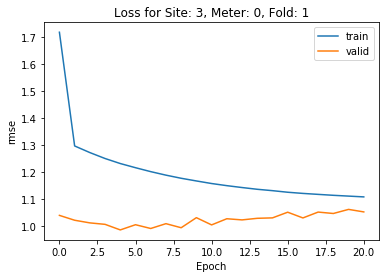

CPU times: user 2min 12s, sys: 7.96 s, total: 2min 19s
Wall time: 1min 47s
Preparing Site: 3 , meter: 0 , Fold: 2
Train on 1774956 samples, validate on 591652 samples
Epoch 1/21
 - 13s - loss: 1.7159 - val_loss: 0.9786
Epoch 2/21
 - 12s - loss: 1.3080 - val_loss: 0.9501
Epoch 3/21
 - 12s - loss: 1.2845 - val_loss: 0.9253
Epoch 4/21
 - 12s - loss: 1.2610 - val_loss: 0.9089
Epoch 5/21
 - 12s - loss: 1.2420 - val_loss: 0.8931
Epoch 6/21
 - 12s - loss: 1.2248 - val_loss: 0.9245
Epoch 7/21
 - 12s - loss: 1.2094 - val_loss: 0.9160
Epoch 8/21
 - 12s - loss: 1.1962 - val_loss: 0.9329
Epoch 9/21
 - 12s - loss: 1.1846 - val_loss: 0.9216
Epoch 10/21
 - 12s - loss: 1.1738 - val_loss: 0.9422
Epoch 11/21
 - 12s - loss: 1.1646 - val_loss: 0.9343
Epoch 12/21
 - 12s - loss: 1.1559 - val_loss: 0.9586
Epoch 13/21
 - 12s - loss: 1.1491 - val_loss: 0.9533
Epoch 14/21
 - 12s - loss: 1.1426 - val_loss: 0.9642
Epoch 15/21
 - 12s - loss: 1.1364 - val_loss: 0.9686
Epoch 16/21
 - 12s - loss: 1.1313 - val_loss: 0

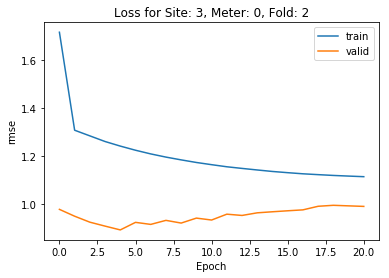

CPU times: user 2min 16s, sys: 8.26 s, total: 2min 25s
Wall time: 1min 52s
Preparing Site: 3 , meter: 0 , Fold: 3
Train on 1774956 samples, validate on 591652 samples
Epoch 1/21
 - 13s - loss: 1.7474 - val_loss: 0.8904
Epoch 2/21
 - 12s - loss: 1.3315 - val_loss: 0.8910
Epoch 3/21
 - 12s - loss: 1.3073 - val_loss: 0.8898
Epoch 4/21
 - 12s - loss: 1.2857 - val_loss: 0.8813
Epoch 5/21
 - 12s - loss: 1.2673 - val_loss: 0.8870
Epoch 6/21
 - 12s - loss: 1.2512 - val_loss: 0.9024
Epoch 7/21
 - 12s - loss: 1.2366 - val_loss: 0.9164
Epoch 8/21
 - 12s - loss: 1.2230 - val_loss: 0.9254
Epoch 9/21
 - 12s - loss: 1.2118 - val_loss: 0.9404
Epoch 10/21
 - 12s - loss: 1.2014 - val_loss: 0.9580
Epoch 11/21
 - 12s - loss: 1.1925 - val_loss: 0.9437
Epoch 12/21
 - 12s - loss: 1.1841 - val_loss: 0.9796
Epoch 13/21
 - 12s - loss: 1.1767 - val_loss: 0.9910
Epoch 14/21
 - 12s - loss: 1.1705 - val_loss: 1.0004
Epoch 15/21
 - 12s - loss: 1.1649 - val_loss: 1.0114
Epoch 16/21
 - 12s - loss: 1.1597 - val_loss: 1

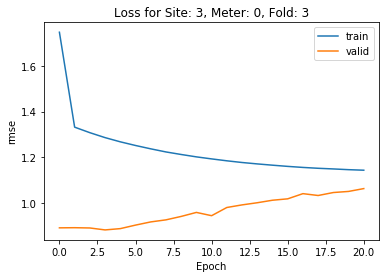

CPU times: user 2min 21s, sys: 8.35 s, total: 2min 29s
Wall time: 1min 56s
Preparing Site: 3 , meter: 0 , Fold: 4
Train on 1774956 samples, validate on 591652 samples
Epoch 1/21
 - 13s - loss: 1.6827 - val_loss: 1.2900
Epoch 2/21
 - 12s - loss: 1.2656 - val_loss: 1.2464
Epoch 3/21
 - 12s - loss: 1.2396 - val_loss: 1.2260
Epoch 4/21
 - 12s - loss: 1.2163 - val_loss: 1.2051
Epoch 5/21
 - 12s - loss: 1.1952 - val_loss: 1.2074
Epoch 6/21
 - 12s - loss: 1.1778 - val_loss: 1.2116
Epoch 7/21
 - 12s - loss: 1.1616 - val_loss: 1.1943
Epoch 8/21
 - 12s - loss: 1.1476 - val_loss: 1.2001
Epoch 9/21
 - 12s - loss: 1.1350 - val_loss: 1.2132
Epoch 10/21
 - 12s - loss: 1.1242 - val_loss: 1.2122
Epoch 11/21
 - 12s - loss: 1.1143 - val_loss: 1.2104
Epoch 12/21
 - 12s - loss: 1.1056 - val_loss: 1.1863
Epoch 13/21
 - 12s - loss: 1.0976 - val_loss: 1.1860
Epoch 14/21
 - 12s - loss: 1.0908 - val_loss: 1.1885
Epoch 15/21
 - 12s - loss: 1.0842 - val_loss: 1.1891
Epoch 16/21
 - 12s - loss: 1.0790 - val_loss: 1

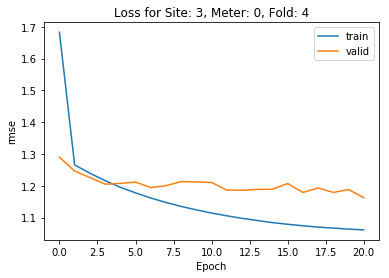

CPU times: user 2min 26s, sys: 9.36 s, total: 2min 35s
Wall time: 2min 2s

CV RMSE for Site: 3 and Meter: 0 is 1.2865168079012708

CV RMSE for Site: 3 is 1.2865168079012708


In [14]:
for meter in df_train.meter.unique():
    print("Building Model for site_id", site_id, "and meter", meter)
        
    df_train_site_meter = df_train[df_train.meter == meter].reset_index(drop=True)
    df_test_site_meter = df_test[df_test.meter == meter].reset_index(drop=True)
    
    pred_val = np.zeros(df_train_site_meter.shape[0])
    pred_test = np.zeros(df_test_site_meter.shape[0])

    row_ids_test = df_test_site_meter.row_id
    y_train_site_meter = df_train_site_meter.log_meter_reading.values
    
    df_train_site_meter = df_train_site_meter[features]
    df_test_site_meter = df_test_site_meter[features]

    df_train_site_meter = pd.get_dummies(df_train_site_meter)
    df_test_site_meter = pd.get_dummies(df_test_site_meter)
        
    for k, (train_idx, valid_idx) in enumerate(folds.split(df_train_site_meter, y_train_site_meter)):
        print("Preparing Site:", site_id, ", meter:", meter, ", Fold:", k+1)
        
        X_train, y_train = df_train_site_meter.iloc[train_idx], y_train_site_meter[train_idx]
        X_valid, y_valid = df_train_site_meter.iloc[valid_idx], y_train_site_meter[valid_idx]
        
        X_train.dropna(axis=1, how="all", inplace=True)
        X_train = X_train.loc[:, (X_train != X_train.iloc[0]).any()]

        X_valid = X_valid[X_train.columns]
        X_test = df_test_site_meter[X_train.columns]
        
        df_means = pd.concat([X_train, X_valid, X_test], ignore_index=True).mean()
        X_train.fillna(df_means, inplace=True)
        X_valid.fillna(df_means, inplace=True)
        X_test.fillna(df_means, inplace=True)
        
        sc = MinMaxScaler()
        sc.fit(pd.concat([X_train, X_valid, X_test], ignore_index=True))
        
        X_train = np.array(sc.transform(X_train))
        X_valid = np.array(sc.transform(X_valid))
        X_test = np.array(sc.transform(X_test))
        
        model = Sequential()
        model.add(Dense(256, input_dim=X_train.shape[1], activation="relu", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(64, activation="tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(8, activation="tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss=rmse, optimizer="adam")
        
        model_ffnn = model.fit(X_train, y_train, epochs=21, batch_size=1000, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

        plt.plot(model_ffnn.history["loss"])
        plt.plot(model_ffnn.history["val_loss"])
        plt.title("Loss for Site: " + str(site_id) + ", Meter: " + str(meter) + ", Fold: " + str(k+1))
        plt.ylabel("rmse")
        plt.xlabel("Epoch")
        plt.legend(["train", "valid"], loc="upper right")
        plt.show()
        
        pred_val[valid_idx] = model.predict(X_valid).ravel()
        %time pred_test += model.predict(X_test).ravel() / cv
        
        gc.collect()
        
    df_valid = pd.DataFrame({"site_id": site_id, "meter": meter, "meter_reading": np.expm1(y_train_site_meter), "pred_ffnn": np.clip(np.expm1(pred_val), 0, a_max=None)})
    df_pred = pd.DataFrame({"row_id": row_ids_test, "meter_reading": np.clip(np.expm1(pred_test), 0, a_max=None)})
    
    df_cv.append(df_valid)
    df_preds.append(df_pred)
    
    gc.collect()
    
    print("\nCV RMSE for Site:", site_id, "and Meter:", meter, "is", np.sqrt(mean_squared_error(np.log1p(df_valid.meter_reading), np.log1p(df_valid.pred_ffnn))))

df_cv = pd.concat(df_cv)
print("\nCV RMSE for Site:", site_id, "is", np.sqrt(mean_squared_error(np.log1p(df_cv.meter_reading), np.log1p(df_cv.pred_ffnn))))

In [15]:
df_preds = pd.concat(df_preds)
df_preds.to_csv("../sub/ffnn_pred_site_" + str(site_id) + ".csv", index=False)